In [ ]:
#### Random Forest ####

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Ronil\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
df = pd.read_csv('C:/Users/Ronil/Desktop/ISB/Term 2/Foundation Project/FinalDF.csv', encoding='cp1252')
df.head()

,Date,Summary,Negative,Positive,Neutral,Comp,Open,High,Low,Close,Adj Close,Volume
0,2021-01-11 00:00:00,Few companies drive stock market across the wo...,0.021,0.177,0.802,0.9739,1938.800049,1938.800049,1892.500000,1897.250000,1891.166260,15371556
1,2021-01-12 00:00:00,"Reliance Industries (RIL) is a good stock?,The...",0.056,0.101,0.843,0.8820,1903.000000,1960.000000,1899.900024,1957.050049,1950.774536,18996047
2,2021-01-13 00:00:00,HDFC Bank has replaced Reliance Industries to ...,0.045,0.029,0.927,-0.1280,1963.550049,1974.949951,1918.449951,1938.800049,1932.583130,12284876
3,2021-01-14 00:00:00,reliance Bhartiartl drreddy cipla biocon \n m...,0.054,0.038,0.908,-0.1873,1945.000000,1966.900024,1939.050049,1960.599976,1954.313110,9946818
4,2021-01-15 00:00:00,"On Friday, Reliance shares fell nearly 4% to R...",0.033,0.155,0.813,0.8957,1960.599976,1973.800049,1920.050049,1937.449951,1931.237305,9503790


In [4]:
df_1 = df[["Negative","Positive","Neutral","Comp","Adj Close"]]

df_1.head()

,Negative,Positive,Neutral,Comp,Adj Close
0,0.021,0.177,0.802,0.9739,1891.166260
1,0.056,0.101,0.843,0.8820,1950.774536
2,0.045,0.029,0.927,-0.1280,1932.583130
3,0.054,0.038,0.908,-0.1873,1954.313110
4,0.033,0.155,0.813,0.8957,1931.237305


In [5]:
# Drop null values
df_1.dropna(inplace = True)
df_1.head()

C:\Users\Ronil\AppData\Roaming\Python\Python37\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Negative,Positive,Neutral,Comp,Adj Close
0,0.021,0.177,0.802,0.9739,1891.166260
1,0.056,0.101,0.843,0.8820,1950.774536
2,0.045,0.029,0.927,-0.1280,1932.583130
3,0.054,0.038,0.908,-0.1873,1954.313110
4,0.033,0.155,0.813,0.8957,1931.237305


In [6]:
df_1.dtypes

Negative     float64
Positive     float64
Neutral      float64
Comp         float64
Adj Close    float64
dtype: object

In [7]:
X = df_1.drop('Adj Close',axis=1)
y = df_1['Adj Close']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [9]:
X_train.head()

,Negative,Positive,Neutral,Comp
110,0.043,0.095,0.862,0.9461
61,0.000,0.093,0.907,0.8624
118,0.012,0.076,0.912,0.9957
52,0.000,0.118,0.882,0.9934
66,0.095,0.055,0.850,-0.8360


In [10]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

C:\Users\Ronil\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
C:\Users\Ronil\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_s

In [11]:
rfc = RandomForestRegressor(n_estimators =200)

In [12]:
rfc.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [13]:
y_pred = rfc.predict(X_test)

C:\Users\Ronil\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [14]:
df_pred=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_pred

,Actual,Predicted
92,2161.945068,2124.612280
238,2359.100098,2225.976170
73,1910.454224,2180.481999
55,1977.937134,2213.759222
181,2572.399902,2340.600408
...,...,...
16,1924.459229,2277.676334
166,2428.199951,2106.714631
170,2430.500000,2215.047512
76,1925.555664,2069.324717


In [15]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 200.53465309928114
Mean Squared Error: 57389.5577487211
Root Mean Squared Error: 239.56117746563422


In [16]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 200.53 degrees.
Accuracy: 90.99 %.


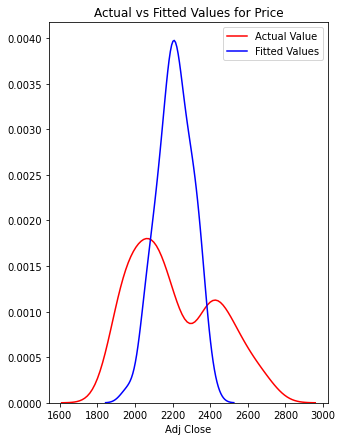

In [17]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

In [18]:
rfc.predict([[0.043,0.095,0.862,0.9461]])

C:\Users\Ronil\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


array([2161.89422292])